<a href="https://colab.research.google.com/github/Joa1Camargo/Analise-de-Dados/blob/main/Case_Jo%C3%A3o_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>  João Store </center>

#### A João Store é uma rede varejista fundada em 2002 com presença em todos os estados brasileiros, com mais de 200 lojas, localizadas principalmente em shoppings.
---

### <center> Dados recebidos </center>
#### 1. Fuistore.sqlite:
- a.tbl.pedido: Tabela contendo todos os produtos vendidos, com identificação do cliente, do pedido e das receitas e custos envolvidos
- b. tbl.info_produto: Tabela com informações adicionais sobre os produtos, como a linha que ele pertence e qual o seu custo unitário para a empresa
#### 2. Cadastro_Clientes.sqlite:
- dados básicos de cadastro do cliente (idade, UF e região), além de informação de renda presumida, adquirida de uma empresa terceira especializada (Bureau de Crédito)
#### 3. ORIGEM_TRAFEGO.csv:
- arquivo com a informação de qual dos canais de marketing trouxe o cliente para o site, para realizar a compra
#### 4. Gasto com Mídia.xlsx:
- informa o gasto com os principais fornecedores de tráfego para a empresa


## <center> Análise de Dados </center>


####  Import das libraries

In [134]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sqlalchemy
import matplotlib.pyplot as plt
import datetime as dt

## Importação dos Dados

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
df_origin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Fui Store/ORIGEM_TRAFEGO.csv', sep=';') # a base de dado iris agora é um dataframe do Pandas
df_origin.head()

,PEDIDO_ERP,CANAL_MARKETING
0,P10000123123,Google Ads
1,P10000123124,Facebook Ads
2,P10000123125,Email
3,P10000123126,Direto
4,P10000123127,Busca orgânica


In [137]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172031 entries, 0 to 172030
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PEDIDO_ERP       172031 non-null  object
 1   CANAL_MARKETING  151600 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [138]:
new_category = 'Dado Ausente'
df_origin['CANAL_MARKETING'] = df_origin['CANAL_MARKETING'].fillna(new_category)
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172031 entries, 0 to 172030
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PEDIDO_ERP       172031 non-null  object
 1   CANAL_MARKETING  172031 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [139]:
file = '/content/drive/MyDrive/Colab Notebooks/Datasets/Fui Store/Gasto_com_Media.xlsx'
media = pd.ExcelFile(file)
df_marketing = media.parse()
df_marketing.head()

,Dia,Facebook Ads,Google Ads
0,2020-01-01,620.02,987.46
1,2020-01-02,596.95,1165.32
2,2020-01-03,691.31,876.76
3,2020-01-04,554.15,804.85
4,2020-01-05,696.08,899.13


In [140]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dia           456 non-null    datetime64[ns]
 1   Facebook Ads  456 non-null    float64       
 2   Google Ads    456 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 10.8 KB


In [141]:
df_clientes = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Datasets/Fui Store/cadastro_clientes.parquet')
df_clientes.isnull().sum()

,0
COD_CLIENTE,0
IDADE,0
UF,0
REGIAO,0
RENDA_PRESUMIDA,0


In [142]:
import sqlalchemy

# Criando a engine passando a string de conexão
engine_str = 'sqlite:////content/drive/MyDrive/Colab Notebooks/Datasets/Fui Store/fuistore.sqlite'
engine = sqlalchemy.create_engine(engine_str)

In [143]:
# já temos a engine! Vamos ver as tableas em um DB
table_names = sqlalchemy.inspect(engine).get_table_names()
print(table_names)

['info_produto', 'pedidos']


In [144]:
df_info_produto = pd.read_sql_query("SELECT * FROM info_produto", engine)
print(df_info_produto.isnull().sum())


PRODUTO               0
CUSTO_MERCADORIA      0
LINHA_PRODUTO       489
dtype: int64


In [145]:
df_pedidos = pd.read_sql_query("SELECT * FROM pedidos", engine)
df_info_produto['LINHA_PRODUTO'] = df_info_produto['LINHA_PRODUTO'].fillna(new_category)
df_info_produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRODUTO           1681 non-null   object 
 1   CUSTO_MERCADORIA  1681 non-null   float64
 2   LINHA_PRODUTO     1681 non-null   object 
dtypes: float64(1), object(2)
memory usage: 39.5+ KB


---
## Visão Geral - Análise

In [146]:
df_pedidos.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE
0,2020-01-01 00:00:00.000000,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32
1,2020-01-01 00:00:00.000000,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00
2,2020-01-01 00:00:00.000000,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93
3,2020-01-01 00:00:00.000000,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00
4,2020-01-01 00:00:00.000000,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57


In [147]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296937 entries, 0 to 296936
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DATA_VENDA          296937 non-null  object 
 1   PEDIDO              296937 non-null  int64  
 2   PEDIDO_ERP          296937 non-null  object 
 3   COD_CLIENTE         296937 non-null  int64  
 4   PRODUTO             296937 non-null  object 
 5   QTDE                296937 non-null  int64  
 6   PRECO_UNITARIO      296937 non-null  float64
 7   DESCONTO_ITEM       296937 non-null  float64
 8   FRETE_PAGO_CLIENTE  296937 non-null  float64
 9   RECEITA             296937 non-null  float64
 10  CUSTO_FRETE         296937 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 24.9+ MB


In [148]:
df_pedidos['DATA_VENDA'] = pd.to_datetime(df_pedidos['DATA_VENDA'], format='%Y-%m-%d %H:%M:%S.%f')
df_pedidos.isnull().sum()

,0
DATA_VENDA,0
PEDIDO,0
PEDIDO_ERP,0
COD_CLIENTE,0
PRODUTO,0
QTDE,0
PRECO_UNITARIO,0
DESCONTO_ITEM,0
FRETE_PAGO_CLIENTE,0
RECEITA,0


#### - Análise do Faturamento por mês

In [149]:
#df_pedidos['MES_VENDA']= df_pedidos['DATA_VENDA'].dt.month
df_pedidos['MES_VENDA'] = df_pedidos['DATA_VENDA'].dt.strftime('%Y-%m')
df_pedidos['FATURAMENTO'] = ((df_pedidos['PRECO_UNITARIO']*df_pedidos['QTDE']))+(df_pedidos['FRETE_PAGO_CLIENTE']-df_pedidos['CUSTO_FRETE'])
visao_geral = df_pedidos.groupby('MES_VENDA')['FATURAMENTO'].sum().reset_index().sort_values('MES_VENDA')
print(visao_geral)

   MES_VENDA  FATURAMENTO
0    2020-01    763724.89
1    2020-02    617656.95
2    2020-03    661673.98
3    2020-04   1581083.09
4    2020-05   4206231.26
5    2020-06   3404516.27
6    2020-07   2066163.48
7    2020-08   1750058.01
8    2020-09   1121047.74
9    2020-10   1385826.06
10   2020-11   3526855.38
11   2020-12   2821936.45
12   2021-01   1341633.82
13   2021-02    850331.98
14   2021-03    362979.98


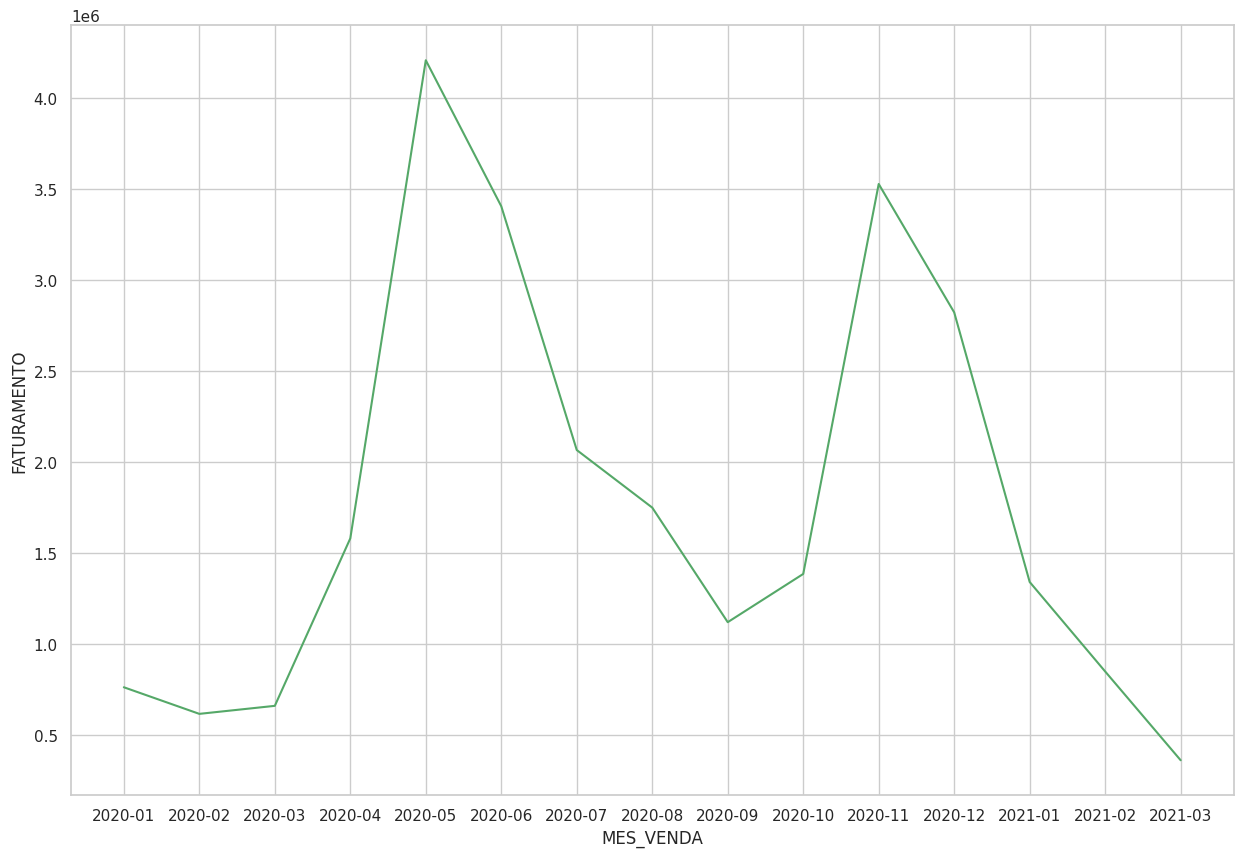

<Figure size 640x480 with 0 Axes>

In [150]:
# definição do tema
sns.set_theme(style="whitegrid")

# dados a serem plotados
plt.figure(figsize=(15,10))

ax = sns.lineplot(x="MES_VENDA", y="FATURAMENTO", data=visao_geral,color="g")
plt.show()
# Add a legend and informative axis label
ax.set(xlim=(-1, 12), ylabel="Receita Total por Mês",
       xlabel="Mês")

sns.despine(left=True, bottom=True)

- ## Análise dos Tipos de Produtos Mais Vendidos por mês

In [151]:
merge_pedidos = pd.merge(df_pedidos,df_info_produto, left_on=['PRODUTO'],
              right_on=['PRODUTO'],
              how='inner')
merge_pedidos

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.9,45.10,ACESSORIOS
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.9,43.13,BOLSAS
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.9,21.97,FASHION
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.8,6.73,BASICO
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.9,36.67,ACESSORIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296932,2020-12-10,8000000011,P10000294136,4049216,B10203,1,59.9,0.00,21.00,80.90,21.00,2020-12,59.9,7.76,BASICO
296933,2020-12-10,8000000012,P10000294137,4019312,E10860Y,1,89.9,0.00,10.50,100.40,10.50,2020-12,89.9,12.38,FASHION
296934,2020-12-10,8000000015,P10000294140,4055873,E10058Y,1,229.9,0.00,10.50,240.40,10.50,2020-12,229.9,36.67,ACESSORIOS
296935,2020-12-10,8000000017,P10000294142,4086203,E10809Y,1,59.9,0.00,4.56,64.46,4.56,2020-12,59.9,8.88,BASICO


In [152]:
merge_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296937 entries, 0 to 296936
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DATA_VENDA          296937 non-null  datetime64[ns]
 1   PEDIDO              296937 non-null  int64         
 2   PEDIDO_ERP          296937 non-null  object        
 3   COD_CLIENTE         296937 non-null  int64         
 4   PRODUTO             296937 non-null  object        
 5   QTDE                296937 non-null  int64         
 6   PRECO_UNITARIO      296937 non-null  float64       
 7   DESCONTO_ITEM       296937 non-null  float64       
 8   FRETE_PAGO_CLIENTE  296937 non-null  float64       
 9   RECEITA             296937 non-null  float64       
 10  CUSTO_FRETE         296937 non-null  float64       
 11  MES_VENDA           296937 non-null  object        
 12  FATURAMENTO         296937 non-null  float64       
 13  CUSTO_MERCADORIA    296937 no

In [153]:
trend = pd.crosstab(index = merge_pedidos['MES_VENDA'], columns = merge_pedidos['LINHA_PRODUTO'] ).reset_index()
trend

LINHA_PRODUTO,MES_VENDA,ACESSORIOS,BASICO,BOLSAS,COMPLEMENTOS,Dado Ausente,FASHION,TECH
0,2020-01,1814,2520,1622,6,0,1702,342
1,2020-02,2001,2399,1320,6,0,1829,235
2,2020-03,2614,2408,885,15,0,1071,205
3,2020-04,5685,5379,679,37,501,2162,273
4,2020-05,14336,17029,1731,69,1601,5172,794
5,2020-06,12658,12480,1834,51,463,6092,739
6,2020-07,5516,7329,1035,26,152,5329,726
7,2020-08,4557,5604,1519,18,228,3816,684
8,2020-09,2603,4232,1173,9,295,3426,567
9,2020-10,2875,5586,1034,2,198,5707,833


In [154]:
merge_pedidos.QTDE.describe()

,QTDE
count,296937.000000
mean,1.096071
std,0.732218
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,100.000000


## Produtos mais vendidos

Text(0.5, 1.0, 'Venda de produtos por mês')

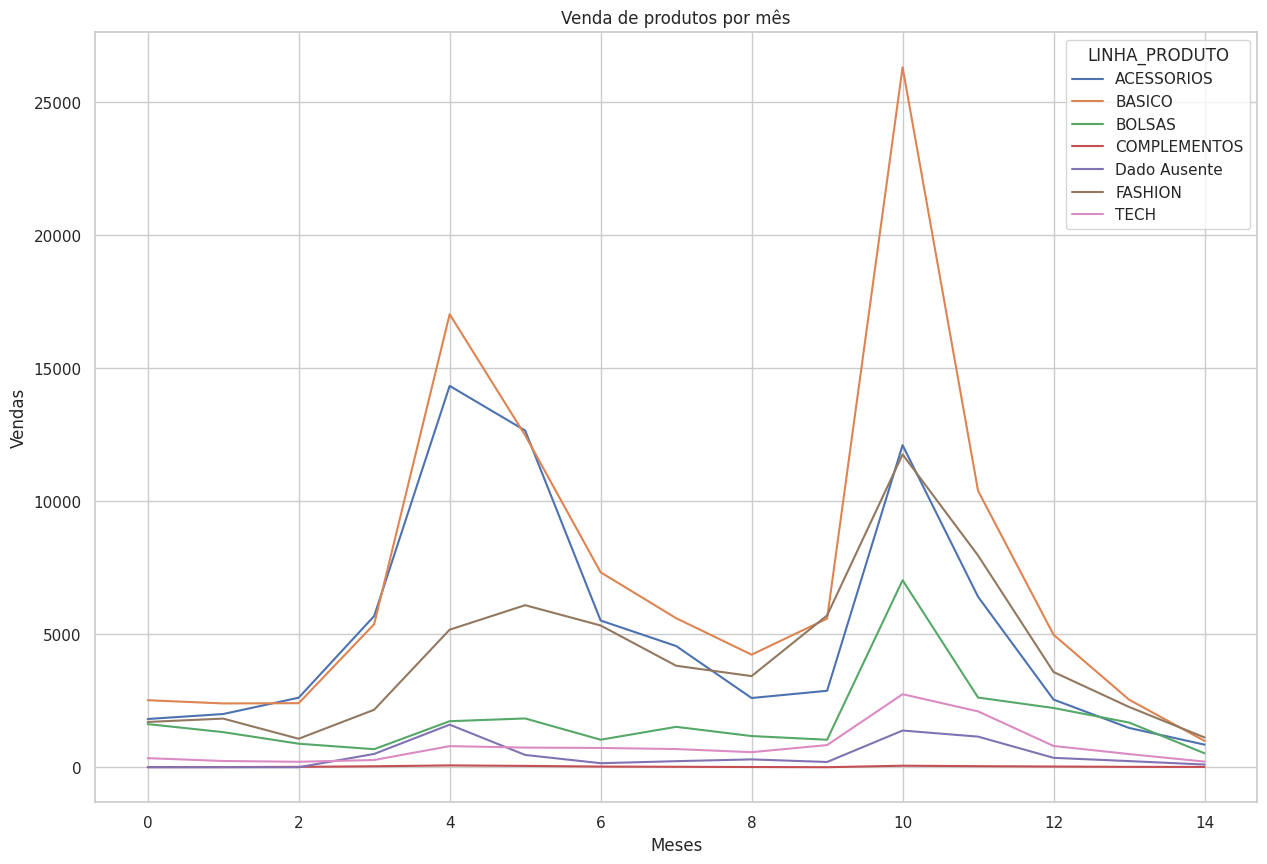

In [155]:
#plt.figure(figsize=(15,10))
#sns.lineplot(data=trend)
#plt.show()
# create stacked bar chart for monthly temperatures

trend.plot(kind='line', stacked=False,figsize=(15,10))

# labels for x & y axis
plt.xlabel('Meses')
plt.ylabel('Vendas')
# title of plot
plt.title('Venda de produtos por mês')

#### Agrupar por linha de desconto para comparar

---
- ##  Novos Clientes - Análise

In [156]:
df_merge = merge_pedidos.copy()
df_merge =pd.merge(df_merge,df_clientes, left_on=['COD_CLIENTE'],
              right_on=['COD_CLIENTE'],
              how='inner')
df_merge

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.9,45.10,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.9,43.13,BOLSAS,34.0,CE,Nordeste,7662.37
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.9,21.97,FASHION,33.0,SP,Sudeste,7881.38
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.8,6.73,BASICO,37.0,RJ,Sudeste,6765.96
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.9,36.67,ACESSORIOS,49.0,PA,Norte,7586.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296932,2020-12-10,8000000011,P10000294136,4049216,B10203,1,59.9,0.00,21.00,80.90,21.00,2020-12,59.9,7.76,BASICO,53.0,MG,Sudeste,7114.90
296933,2020-12-10,8000000012,P10000294137,4019312,E10860Y,1,89.9,0.00,10.50,100.40,10.50,2020-12,89.9,12.38,FASHION,35.0,PE,Nordeste,8400.16
296934,2020-12-10,8000000015,P10000294140,4055873,E10058Y,1,229.9,0.00,10.50,240.40,10.50,2020-12,229.9,36.67,ACESSORIOS,41.0,RN,Nordeste,8306.05
296935,2020-12-10,8000000017,P10000294142,4086203,E10809Y,1,59.9,0.00,4.56,64.46,4.56,2020-12,59.9,8.88,BASICO,31.0,MA,Nordeste,8068.73


### Análise de Clientes Recorrentes

In [157]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df_merge['DATA_VENDA'] = df_merge['DATA_VENDA'].apply(get_month)
df_merge.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.9,45.10,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.9,43.13,BOLSAS,34.0,CE,Nordeste,7662.37
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.9,21.97,FASHION,33.0,SP,Sudeste,7881.38
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.8,6.73,BASICO,37.0,RJ,Sudeste,6765.96
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.9,36.67,ACESSORIOS,49.0,PA,Norte,7586.56


In [158]:
grouping = df_merge.groupby('COD_CLIENTE')['DATA_VENDA']
grouping.head()


,DATA_VENDA
0,2020-01-01
1,2020-01-01
2,2020-01-01
3,2020-01-01
4,2020-01-01
...,...
296932,2020-12-01
296933,2020-12-01
296934,2020-12-01
296935,2020-12-01


In [159]:
df_merge['COORTE']= grouping.transform('min')
df_merge


,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA,COORTE
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.9,45.10,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90,2020-01-01
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.9,43.13,BOLSAS,34.0,CE,Nordeste,7662.37,2020-01-01
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.9,21.97,FASHION,33.0,SP,Sudeste,7881.38,2020-01-01
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.8,6.73,BASICO,37.0,RJ,Sudeste,6765.96,2020-01-01
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.9,36.67,ACESSORIOS,49.0,PA,Norte,7586.56,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296932,2020-12-01,8000000011,P10000294136,4049216,B10203,1,59.9,0.00,21.00,80.90,21.00,2020-12,59.9,7.76,BASICO,53.0,MG,Sudeste,7114.90,2020-12-01
296933,2020-12-01,8000000012,P10000294137,4019312,E10860Y,1,89.9,0.00,10.50,100.40,10.50,2020-12,89.9,12.38,FASHION,35.0,PE,Nordeste,8400.16,2020-12-01
296934,2020-12-01,8000000015,P10000294140,4055873,E10058Y,1,229.9,0.00,10.50,240.40,10.50,2020-12,229.9,36.67,ACESSORIOS,41.0,RN,Nordeste,8306.05,2020-12-01
296935,2020-12-01,8000000017,P10000294142,4086203,E10809Y,1,59.9,0.00,4.56,64.46,4.56,2020-12,59.9,8.88,BASICO,31.0,MA,Nordeste,8068.73,2020-12-01


In [160]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date

ANO_FATURA, MES_FATURA, _ = get_date_int(df_merge, 'DATA_VENDA')
ANO_COORTE, MES_COORTE , _ = get_date_int(df_merge, 'COORTE')
diff_ano = ANO_FATURA - ANO_COORTE
diff_mes = MES_FATURA - MES_COORTE
df_merge['COORTE_INDEX'] = diff_ano*12 + diff_mes +1
df_merge.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA,COORTE,COORTE_INDEX
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.9,45.10,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90,2020-01-01,1
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.9,43.13,BOLSAS,34.0,CE,Nordeste,7662.37,2020-01-01,1
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.9,21.97,FASHION,33.0,SP,Sudeste,7881.38,2020-01-01,1
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.8,6.73,BASICO,37.0,RJ,Sudeste,6765.96,2020-01-01,1
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.9,36.67,ACESSORIOS,49.0,PA,Norte,7586.56,2020-01-01,1


In [161]:
grouping = df_merge.groupby(['COORTE', 'COORTE_INDEX'])
grouping.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA,COORTE,COORTE_INDEX
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.90,45.10,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90,2020-01-01,1
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.90,43.13,BOLSAS,34.0,CE,Nordeste,7662.37,2020-01-01,1
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.90,21.97,FASHION,33.0,SP,Sudeste,7881.38,2020-01-01,1
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.80,6.73,BASICO,37.0,RJ,Sudeste,6765.96,2020-01-01,1
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.90,36.67,ACESSORIOS,49.0,PA,Norte,7586.56,2020-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238657,2021-03-01,7170192,P10000292340,4027466,E10660Y,1,229.9,0.00,4.95,234.85,4.95,2021-03,229.90,37.19,ACESSORIOS,49.0,MG,Sudeste,8446.49,2020-07-01,9
238661,2021-03-01,7170197,P10000292357,4128796,E10875Y,1,79.9,-29.56,6.50,56.84,6.50,2021-03,79.90,14.47,BOLSAS,47.0,GO,Centro-Oeste,8081.11,2020-03-01,13
238827,2021-03-01,7170299,P10000292442,4059609,B10003,1,39.9,-3.99,4.30,40.21,4.30,2021-03,39.90,7.45,FASHION,26.0,MG,Sudeste,8112.08,2021-01-01,3
238902,2021-03-01,7170330,P10000292475,4076941,E10430Y,1,19.9,0.00,0.00,19.90,0.00,2021-03,19.90,11.94,BOLSAS,56.0,SE,Nordeste,8200.52,2020-01-01,15


In [162]:
cohort_data = grouping['COD_CLIENTE'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data


,COORTE,COORTE_INDEX,COD_CLIENTE
0,2020-01-01,1,4746
1,2020-01-01,2,132
2,2020-01-01,3,76
3,2020-01-01,4,81
4,2020-01-01,5,144
...,...,...,...
115,2021-01-01,2,110
116,2021-01-01,3,29
117,2021-02-01,1,4371
118,2021-02-01,2,31


In [163]:
print(df_merge.shape)
print(cohort_data.shape)

(296937, 21)
(120, 3)


In [164]:
cohort_counts = cohort_data.pivot(index="COORTE",
                                  columns="COORTE_INDEX",
                                  values="COD_CLIENTE")
retention = cohort_counts
retention

COORTE_INDEX,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
COORTE,,,,,,,,,,,,,,,
2020-01-01,4746.0,132.0,76.0,81.0,144.0,132.0,80.0,65.0,66.0,71.0,215.0,93.0,75.0,32.0,22.0
2020-02-01,4000.0,87.0,61.0,103.0,114.0,58.0,59.0,60.0,41.0,200.0,59.0,60.0,36.0,18.0,NaN
2020-03-01,3969.0,106.0,129.0,94.0,61.0,64.0,51.0,73.0,161.0,69.0,49.0,33.0,21.0,NaN,NaN
2020-04-01,8307.0,380.0,245.0,141.0,133.0,82.0,80.0,264.0,137.0,90.0,47.0,28.0,NaN,NaN,NaN
2020-05-01,23855.0,731.0,444.0,370.0,226.0,263.0,613.0,413.0,184.0,125.0,56.0,NaN,NaN,NaN,NaN
2020-06-01,19531.0,393.0,277.0,213.0,220.0,576.0,349.0,159.0,121.0,53.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,11036.0,251.0,141.0,167.0,376.0,242.0,133.0,67.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,8954.0,176.0,147.0,357.0,205.0,100.0,52.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,5908.0,175.0,355.0,149.0,104.0,66.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pegar a primeira coluna que é a base ativa e colocar no gráfico de coorte ou fazer o gráfico de barras. Agregar as datas no cliente único do mês para tentar encontrar o cliente novo. Coluna de data -180 dias.

In [165]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes.head()

,1
COORTE,
2020-01-01,4746.0
2020-02-01,4000.0
2020-03-01,3969.0
2020-04-01,8307.0
2020-05-01,23855.0


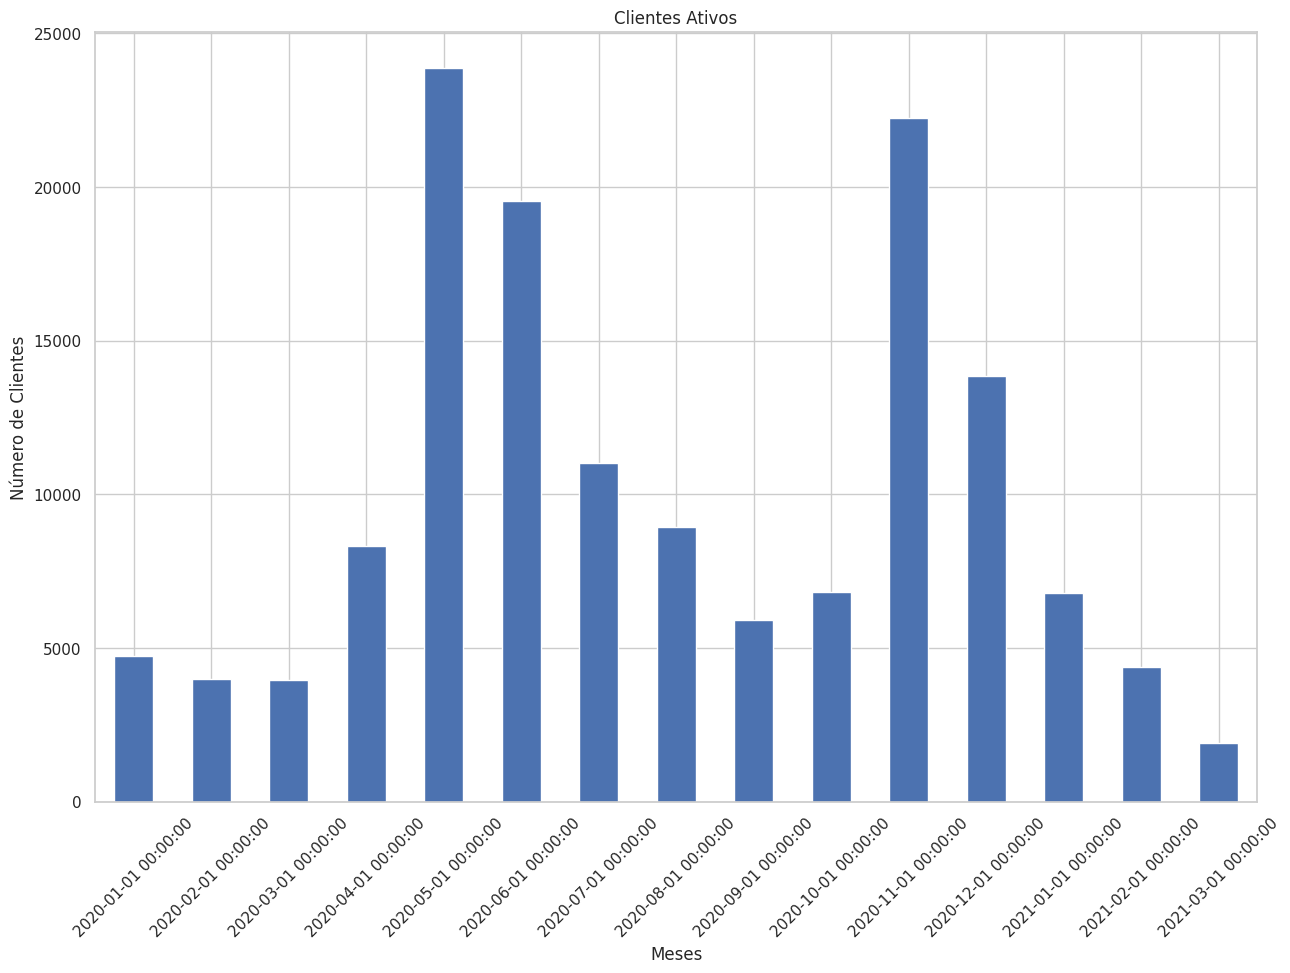

In [166]:
cohort_sizes.plot(kind='bar', stacked=False,figsize=(15,10),x ='CANAL_MARKETING')

# labels for x & y axis

plt.xlabel('Meses')
plt.ylabel('Número de Clientes')
# title of plot
plt.title('Clientes Ativos')
plt.xticks(rotation=45)
plt.show()

In [167]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

COORTE_INDEX,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
COORTE,,,,,,,,,,,,,,,
2020-01-01,1.0,0.027813,0.016013,0.017067,0.030341,0.027813,0.016856,0.013696,0.013906,0.014960,0.045301,0.019595,0.015803,0.006743,0.004635
2020-02-01,1.0,0.021750,0.015250,0.025750,0.028500,0.014500,0.014750,0.015000,0.010250,0.050000,0.014750,0.015000,0.009000,0.004500,NaN
2020-03-01,1.0,0.026707,0.032502,0.023684,0.015369,0.016125,0.012850,0.018393,0.040564,0.017385,0.012346,0.008314,0.005291,NaN,NaN
2020-04-01,1.0,0.045745,0.029493,0.016974,0.016011,0.009871,0.009630,0.031780,0.016492,0.010834,0.005658,0.003371,NaN,NaN,NaN
2020-05-01,1.0,0.030643,0.018612,0.015510,0.009474,0.011025,0.025697,0.017313,0.007713,0.005240,0.002348,NaN,NaN,NaN,NaN


In [168]:
retention.round(3)*100

COORTE_INDEX,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
COORTE,,,,,,,,,,,,,,,
2020-01-01,100.0,2.8,1.6,1.7,3.0,2.8,1.7,1.4,1.4,1.5,4.5,2.0,1.6,0.7,0.5
2020-02-01,100.0,2.2,1.5,2.6,2.8,1.4,1.5,1.5,1.0,5.0,1.5,1.5,0.9,0.4,NaN
2020-03-01,100.0,2.7,3.3,2.4,1.5,1.6,1.3,1.8,4.1,1.7,1.2,0.8,0.5,NaN,NaN
2020-04-01,100.0,4.6,2.9,1.7,1.6,1.0,1.0,3.2,1.6,1.1,0.6,0.3,NaN,NaN,NaN
2020-05-01,100.0,3.1,1.9,1.6,0.9,1.1,2.6,1.7,0.8,0.5,0.2,NaN,NaN,NaN,NaN
2020-06-01,100.0,2.0,1.4,1.1,1.1,2.9,1.8,0.8,0.6,0.3,NaN,NaN,NaN,NaN,NaN
2020-07-01,100.0,2.3,1.3,1.5,3.4,2.2,1.2,0.6,0.3,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,100.0,2.0,1.6,4.0,2.3,1.1,0.6,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,100.0,3.0,6.0,2.5,1.8,1.1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Recorrência dos Clientes

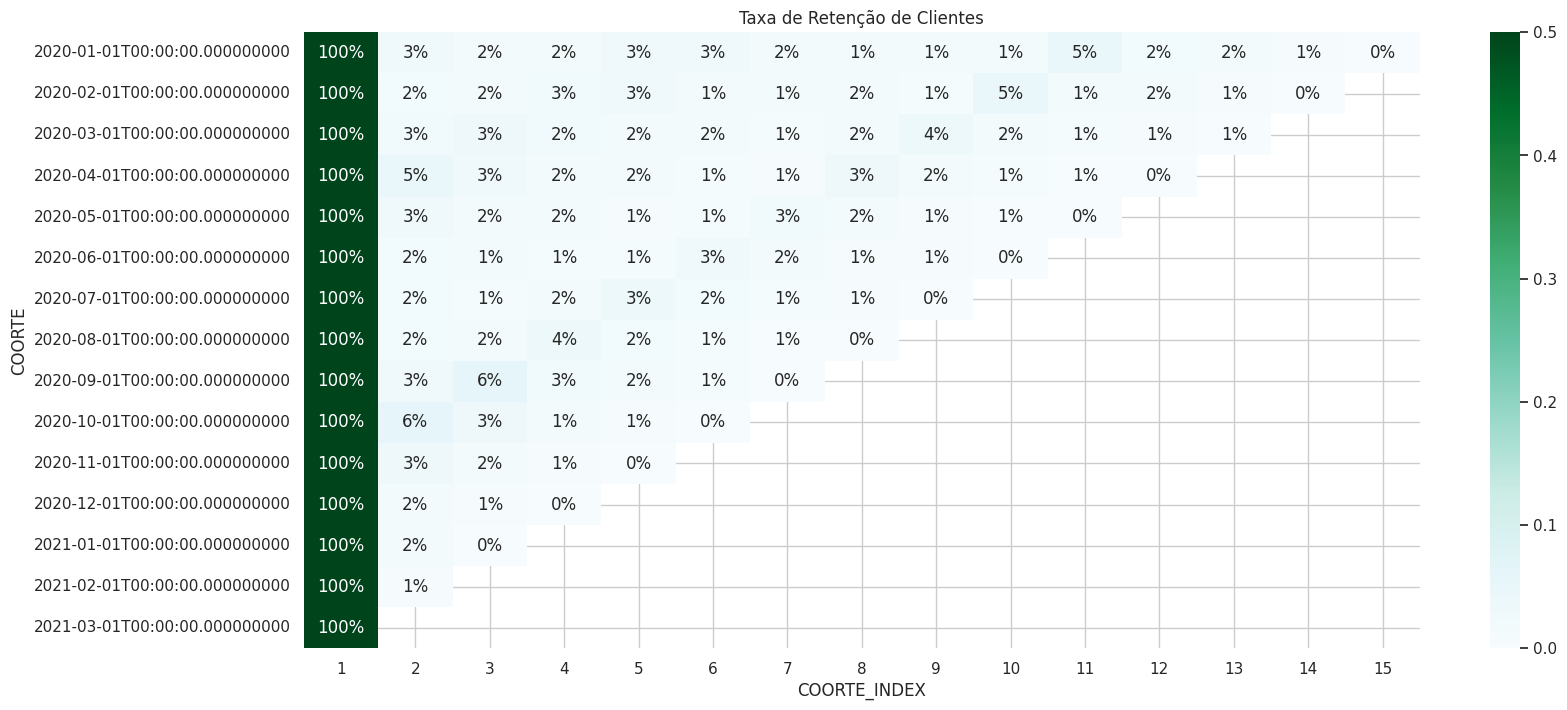

In [169]:
plt.figure(figsize=(18,8))
plt.title("Taxa de Retenção de Clientes")
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="BuGn")
plt.show()

---
- ## Análise dos Canais de Marketing

In [170]:
df_merge.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA,COORTE,COORTE_INDEX
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.9,45.10,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90,2020-01-01,1
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.9,43.13,BOLSAS,34.0,CE,Nordeste,7662.37,2020-01-01,1
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.9,21.97,FASHION,33.0,SP,Sudeste,7881.38,2020-01-01,1
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.8,6.73,BASICO,37.0,RJ,Sudeste,6765.96,2020-01-01,1
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.9,36.67,ACESSORIOS,49.0,PA,Norte,7586.56,2020-01-01,1


In [171]:
df_merge = pd.merge(df_merge,df_origin, left_on=['PEDIDO_ERP'],
              right_on=['PEDIDO_ERP'],
              how='inner')
df_merge.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA,COORTE,COORTE_INDEX,CANAL_MARKETING
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.9,45.10,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90,2020-01-01,1,Google Ads
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.9,43.13,BOLSAS,34.0,CE,Nordeste,7662.37,2020-01-01,1,Facebook Ads
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.9,21.97,FASHION,33.0,SP,Sudeste,7881.38,2020-01-01,1,Busca orgânica
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.8,6.73,BASICO,37.0,RJ,Sudeste,6765.96,2020-01-01,1,Facebook Ads
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.9,36.67,ACESSORIOS,49.0,PA,Norte,7586.56,2020-01-01,1,Dado Ausente


In [172]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296937 entries, 0 to 296936
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DATA_VENDA          296937 non-null  datetime64[ns]
 1   PEDIDO              296937 non-null  int64         
 2   PEDIDO_ERP          296937 non-null  object        
 3   COD_CLIENTE         296937 non-null  int64         
 4   PRODUTO             296937 non-null  object        
 5   QTDE                296937 non-null  int64         
 6   PRECO_UNITARIO      296937 non-null  float64       
 7   DESCONTO_ITEM       296937 non-null  float64       
 8   FRETE_PAGO_CLIENTE  296937 non-null  float64       
 9   RECEITA             296937 non-null  float64       
 10  CUSTO_FRETE         296937 non-null  float64       
 11  MES_VENDA           296937 non-null  object        
 12  FATURAMENTO         296937 non-null  float64       
 13  CUSTO_MERCADORIA    296937 no

In [173]:
trend2 = pd.crosstab(index = df_merge['MES_VENDA'], columns = df_merge['CANAL_MARKETING'] ).reset_index()
trend2

CANAL_MARKETING,MES_VENDA,Busca orgânica,Dado Ausente,Direto,Email,Facebook Ads,Google Ads,Outros,Referência
0,2020-01,1675,349,810,1478,368,2599,350,377
1,2020-02,1414,332,758,1233,682,2643,367,361
2,2020-03,1297,430,638,769,675,2584,295,510
3,2020-04,3015,734,1448,971,1191,5722,677,958
4,2020-05,8218,2058,3866,1636,3657,15419,2294,3584
5,2020-06,5699,2502,2627,1638,3583,13020,1783,3465
6,2020-07,3177,2486,2147,827,2315,6888,828,1445
7,2020-08,2467,2255,1770,966,1894,5361,711,1002
8,2020-09,1875,1498,1457,863,1232,3882,763,735
9,2020-10,2300,1878,2041,1449,1139,5238,1070,1120


## Pedidos por Canal de Marketing

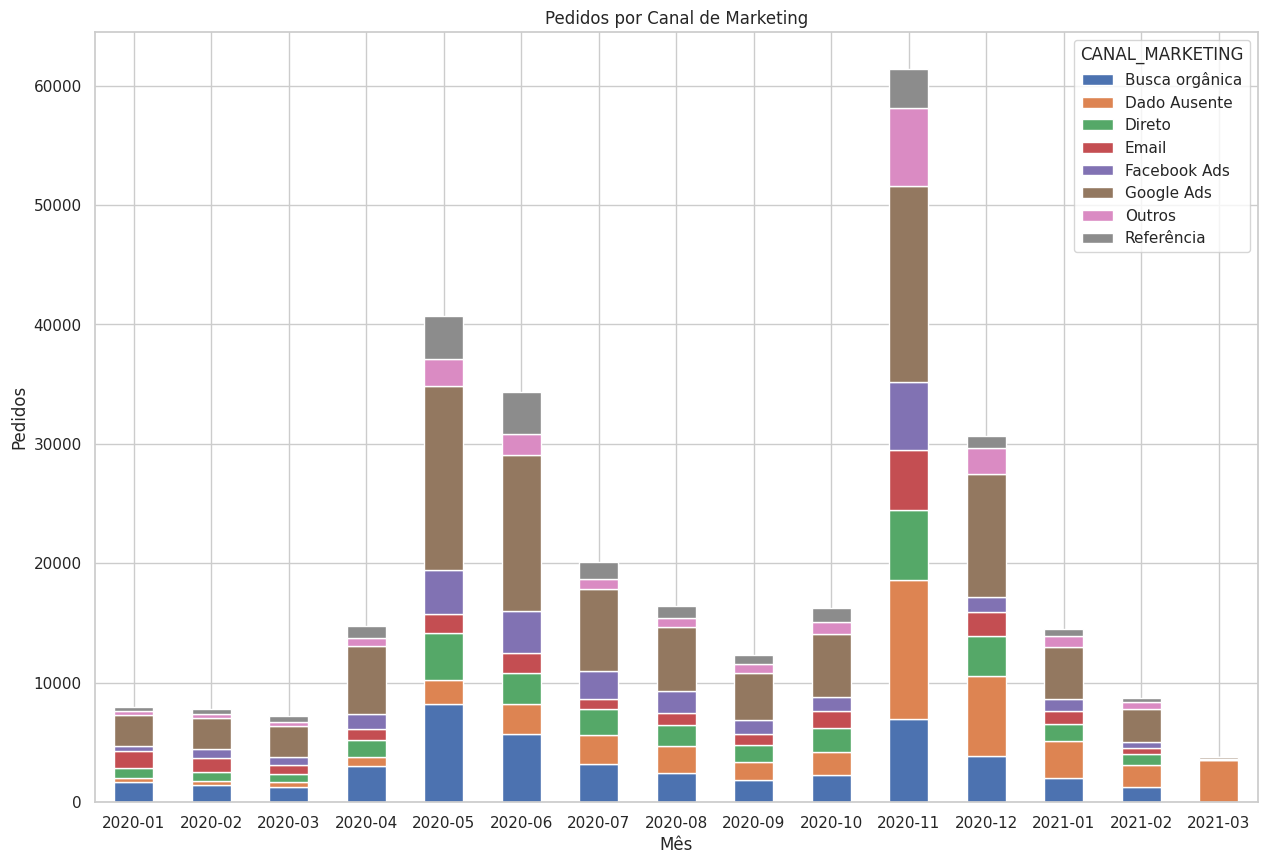

In [174]:
# create stacked bar chart for monthly temperatures

trend2.plot(kind='bar', stacked=True,figsize=(15,10), x='MES_VENDA')

# labels for x & y axis
plt.xlabel('Mês')
plt.ylabel('Pedidos')
# title of plot
plt.title('Pedidos por Canal de Marketing')
plt.xticks(rotation=0)
plt.show()

In [175]:
trend3 = df_merge.groupby(df_merge['CANAL_MARKETING'])['RECEITA'].sum().reset_index()
trend3

,CANAL_MARKETING,RECEITA
0,Busca orgânica,4722539.46
1,Dado Ausente,3383336.03
2,Direto,2963369.86
3,Email,1773146.60
4,Facebook Ads,2251013.30
5,Google Ads,10261674.45
6,Outros,1581049.40
7,Referência,1788930.48


In [176]:
df_marketing

,Dia,Facebook Ads,Google Ads
0,2020-01-01,620.02,987.46
1,2020-01-02,596.95,1165.32
2,2020-01-03,691.31,876.76
3,2020-01-04,554.15,804.85
4,2020-01-05,696.08,899.13
...,...,...,...
451,2021-03-27,350.57,778.54
452,2021-03-28,371.65,994.93
453,2021-03-29,306.72,894.11
454,2021-03-30,303.54,651.89


In [177]:
df_mkt_melt =pd.melt(df_marketing, id_vars=['Dia'])
df_mkt_melt.rename(columns = {'variable':'CANAL_MARKETING', 'value':'CUSTO'}, inplace = True)
df_mkt_melt['Dia'] = pd.to_datetime(df_mkt_melt['Dia'])
df_mkt_melt['MES_VENDA'] = df_mkt_melt['Dia'].dt.strftime('%Y-%m')

df_mktcost = df_mkt_melt.groupby(df_mkt_melt['CANAL_MARKETING'])['CUSTO'].sum().reset_index()
df_mktcost

,CANAL_MARKETING,CUSTO
0,Facebook Ads,700325.01
1,Google Ads,368904.09


In [178]:
trend4 =pd.merge(trend3,df_mktcost, left_on=['CANAL_MARKETING'],
              right_on=['CANAL_MARKETING'],
              how='left')
trend4

,CANAL_MARKETING,RECEITA,CUSTO
0,Busca orgânica,4722539.46,NaN
1,Dado Ausente,3383336.03,NaN
2,Direto,2963369.86,NaN
3,Email,1773146.60,NaN
4,Facebook Ads,2251013.30,700325.01
5,Google Ads,10261674.45,368904.09
6,Outros,1581049.40,NaN
7,Referência,1788930.48,NaN


## Comparação Entre Canais de Marketing

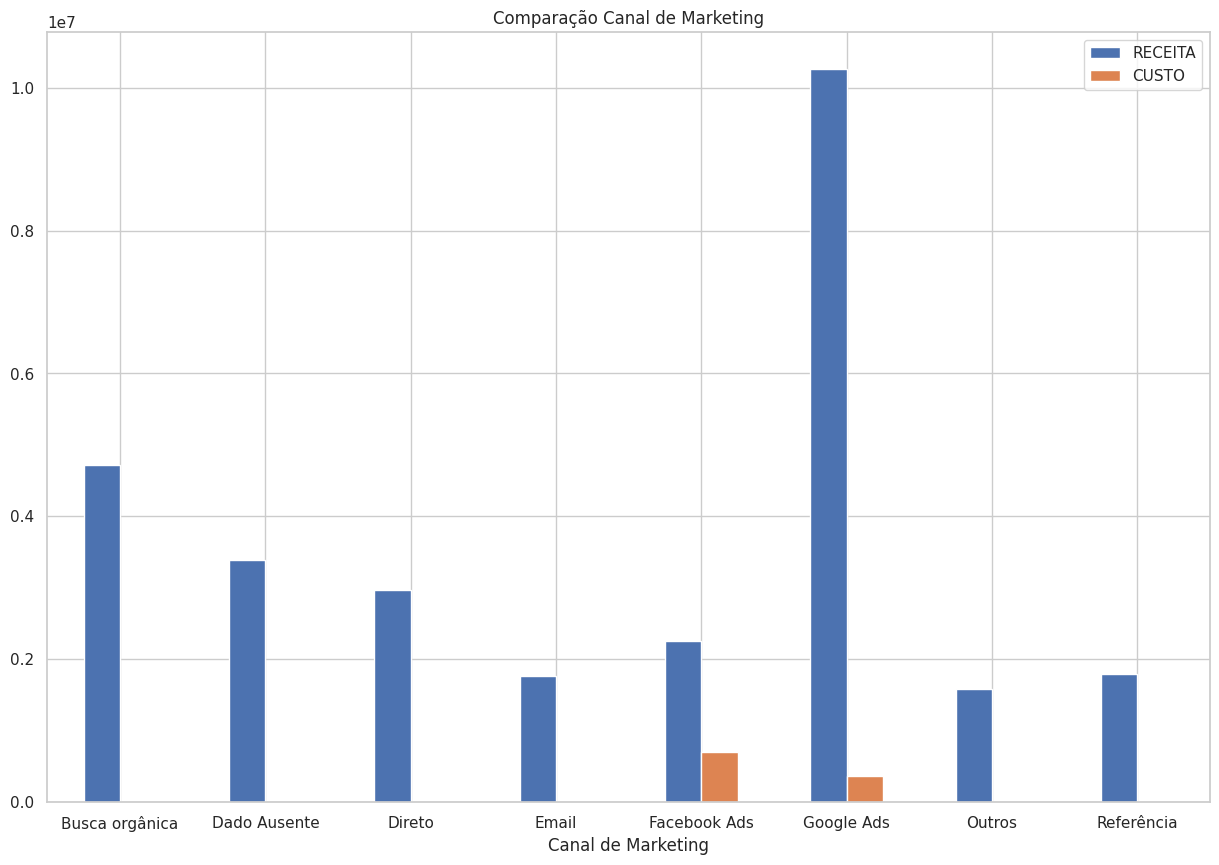

In [179]:
trend4.plot(kind='bar', stacked=False,figsize=(15,10),x ='CANAL_MARKETING')

# labels for x & y axis

plt.xlabel('Canal de Marketing')
# title of plot
plt.title('Comparação Canal de Marketing')
plt.xticks(rotation=0)
plt.show()

In [180]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


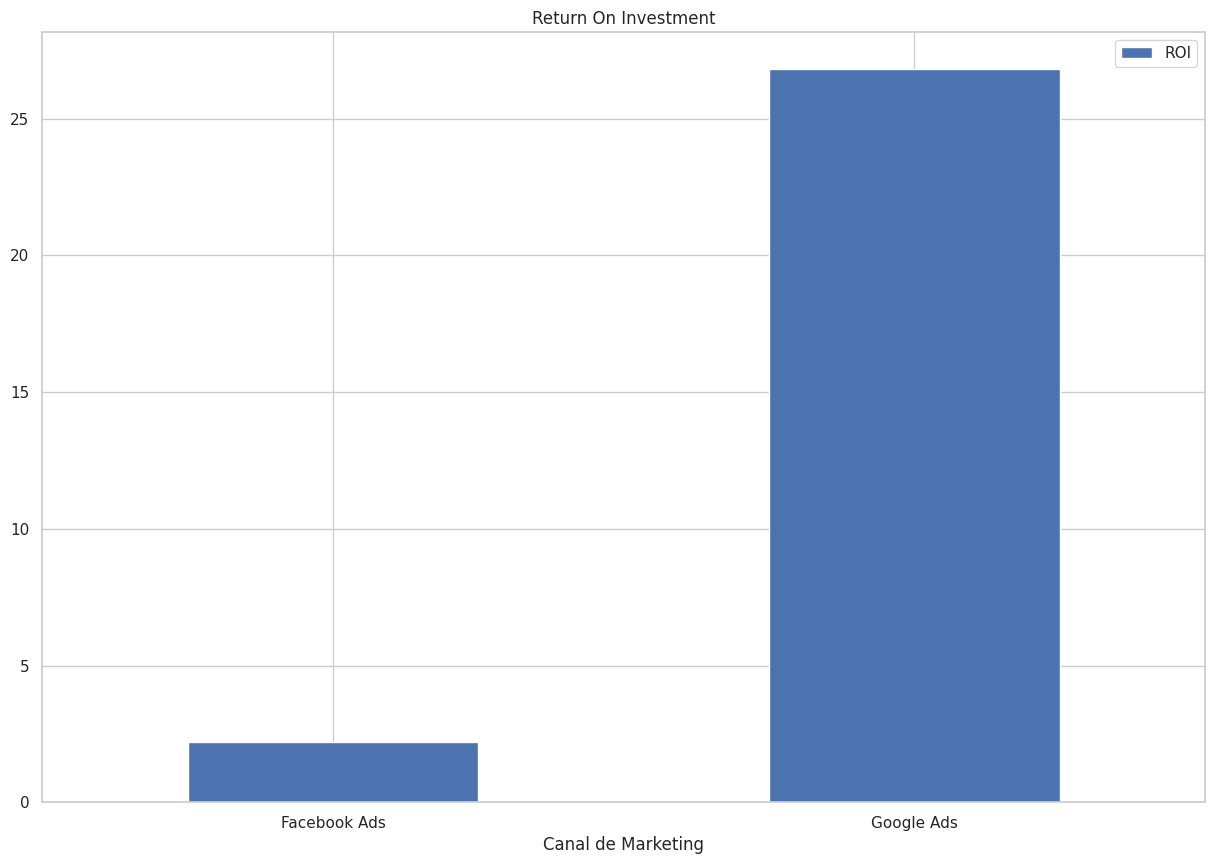

In [181]:
roi = trend4.copy()
roi['ROI'] = (trend4['RECEITA']-trend4['CUSTO'])/trend4['CUSTO']
roi = roi.dropna(axis=0, subset=('ROI'))


roi.plot(kind='bar', stacked=False,figsize=(15,10),x ='CANAL_MARKETING',y='ROI')

# labels for x & y axis
plt.xlabel('Canal de Marketing')
# title of plot
plt.title('Return On Investment')
plt.xticks(rotation=0)
plt.show()

---
- ## Análise de Margem

In [182]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
df_merge.sort_values('QTDE', ascending = False).head(100)


,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA,COORTE,COORTE_INDEX,CANAL_MARKETING
264859,2020-11-01,7118877,P10000241404,4046694,E10451Y,100,19.9,0.00,0.00,1990.00,2.59,2020-11,1987.41,27.13,BASICO,28.0,BA,Nordeste,11113.55,2020-10-01,2,Dado Ausente
78922,2020-05-01,7030055,P10000152732,4024278,E10369Y,94,9.9,0.00,0.00,930.60,1.29,2020-05,929.31,17.05,ACESSORIOS,25.0,BA,Nordeste,10940.44,2020-05-01,1,Google Ads
219771,2020-11-01,7133102,P10000255665,4094103,E10682Y,89,89.9,0.00,0.00,8001.10,11.69,2020-11,7989.41,24.19,BOLSAS,31.0,SP,Sudeste,24509.96,2020-11-01,1,Dado Ausente
249850,2020-11-01,7109220,P10000231748,4055110,E10394Y,70,9.9,0.00,0.00,693.00,1.29,2020-11,691.71,8.69,FASHION,31.0,SP,Sudeste,8406.07,2020-01-01,11,Dado Ausente
180204,2020-11-01,7112027,P10000234559,4007735,B10175,63,19.9,0.00,0.00,1253.70,2.59,2020-11,1251.11,8.28,FASHION,28.0,MG,Sudeste,15684.67,2020-11-01,1,Google Ads
263104,2020-11-01,7116683,P10000239158,4059693,E10393,60,9.9,0.00,0.00,594.00,1.29,2020-11,592.71,4.11,BASICO,60.0,MG,Sudeste,8675.31,2020-07-01,5,Direto
242326,2020-10-01,7105490,P10000228017,4113368,E10539Y,60,139.9,-7135.20,0.00,1258.80,18.19,2020-10,8375.81,20.43,TECH,27.0,AL,Nordeste,9867.70,2020-10-01,1,Direto
270136,2020-11-01,7125774,P10000248264,4041737,E10170Y,57,9.9,-56.43,0.00,507.87,1.29,2020-11,563.01,5.37,BASICO,25.0,RJ,Sudeste,9446.01,2020-11-01,1,Dado Ausente
42570,2020-05-01,7035353,P10000158004,4022911,E10369Y,50,9.9,0.00,0.00,495.00,1.29,2020-05,493.71,17.05,ACESSORIOS,23.0,BA,Nordeste,8371.77,2020-05-01,1,Busca orgânica
206721,2020-11-01,7124953,P10000247493,4120248,E10490Y,50,59.9,0.00,0.00,2995.00,7.79,2020-11,2987.21,16.13,FASHION,31.0,SP,Sudeste,19392.52,2020-11-01,1,Google Ads


In [183]:
print(df_info_produto)
df_mergeprod = df_info_produto.copy()
df_mergeprod = pd.merge(df_info_produto,df_pedidos, left_on=['PRODUTO'],
                right_on=['PRODUTO'],
                how='left')
df_mergeprod

      PRODUTO  CUSTO_MERCADORIA LINHA_PRODUTO
0     A10001G             21.10        BASICO
1     A10002M             21.10        BASICO
2     A10003M             22.60        BASICO
3     A10004P             22.60        BASICO
4     A10005M             22.60        BASICO
...       ...               ...           ...
1676   G10006             44.75    ACESSORIOS
1677   G10007             51.55    ACESSORIOS
1678   G10008             44.01    ACESSORIOS
1679   G10009             46.46    ACESSORIOS
1680   G10010             45.01    ACESSORIOS

[1681 rows x 3 columns]


,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO
0,A10001G,21.10,BASICO,2020-11-03,7110620,P10000233167,4019515,1,59.9,0.0,4.30,64.20,4.30,2020-11,59.90
1,A10001G,21.10,BASICO,2020-09-04,7093740,P10000216261,4017261,1,59.9,0.0,0.00,59.90,7.79,2020-09,52.11
2,A10002M,21.10,BASICO,2021-01-22,7161508,P10000283866,4110263,1,59.9,0.0,0.00,59.90,7.79,2021-01,52.11
3,A10002M,21.10,BASICO,2021-01-02,7155350,P10000277710,4011082,1,59.9,0.0,3.23,63.13,3.23,2021-01,59.90
4,A10003M,22.60,BASICO,2020-09-04,7093740,P10000216261,4017261,1,59.9,0.0,0.00,59.90,7.79,2020-09,52.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296932,G10010,45.01,ACESSORIOS,2020-11-27,7131326,P10000253829,4031812,1,99.9,0.0,0.00,99.90,12.99,2020-11,86.91
296933,G10010,45.01,ACESSORIOS,2020-12-09,7142646,P10000265034,4015740,1,99.9,0.0,12.90,112.80,12.90,2020-12,99.90
296934,G10010,45.01,ACESSORIOS,2020-12-14,7145818,P10000268236,4095737,1,99.9,0.0,6.45,106.35,6.45,2020-12,99.90
296935,G10010,45.01,ACESSORIOS,2020-12-20,7150349,P10000272742,4018858,1,99.9,0.0,12.90,112.80,12.90,2020-12,99.90


In [184]:
df_mergeprod.drop_duplicates(subset=['PRODUTO'], keep='first', inplace=True, ignore_index=True)
df_mergeprod

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO
0,A10001G,21.10,BASICO,2020-11-03,7110620,P10000233167,4019515,1,59.9,0.0,4.30,64.20,4.30,2020-11,59.90
1,A10002M,21.10,BASICO,2021-01-22,7161508,P10000283866,4110263,1,59.9,0.0,0.00,59.90,7.79,2021-01,52.11
2,A10003M,22.60,BASICO,2020-09-04,7093740,P10000216261,4017261,1,59.9,0.0,0.00,59.90,7.79,2020-09,52.11
3,A10004P,22.60,BASICO,2020-07-26,7079782,P10000202321,4024947,1,59.9,0.0,0.00,59.90,7.79,2020-07,52.11
4,A10005M,22.60,BASICO,2020-10-31,7108173,P10000230700,4043592,1,69.9,0.0,12.90,82.80,12.90,2020-10,69.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,G10006,44.75,ACESSORIOS,2020-02-03,7005225,P10000128189,4026005,1,159.9,-8.0,22.80,174.70,22.80,2020-02,159.90
1677,G10007,51.55,ACESSORIOS,2020-02-06,7005878,P10000128813,4086948,1,189.9,0.0,0.00,189.90,24.69,2020-02,165.21
1678,G10008,44.01,ACESSORIOS,2020-01-29,7004357,P10000127348,4100626,1,159.9,0.0,12.95,172.85,12.95,2020-01,159.90
1679,G10009,46.46,ACESSORIOS,2020-01-10,7001265,P10000124380,4082722,1,149.9,0.0,0.00,149.90,19.49,2020-01,130.41


In [185]:
df_mergeprod['MARGEM']= (df_mergeprod['RECEITA']-(df_mergeprod['CUSTO_FRETE']+df_mergeprod['CUSTO_MERCADORIA']+((27.25/100)*df_mergeprod['RECEITA'])))

df_mergeprod

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,MARGEM
0,A10001G,21.10,BASICO,2020-11-03,7110620,P10000233167,4019515,1,59.9,0.0,4.30,64.20,4.30,2020-11,59.90,21.305500
1,A10002M,21.10,BASICO,2021-01-22,7161508,P10000283866,4110263,1,59.9,0.0,0.00,59.90,7.79,2021-01,52.11,14.687250
2,A10003M,22.60,BASICO,2020-09-04,7093740,P10000216261,4017261,1,59.9,0.0,0.00,59.90,7.79,2020-09,52.11,13.187250
3,A10004P,22.60,BASICO,2020-07-26,7079782,P10000202321,4024947,1,59.9,0.0,0.00,59.90,7.79,2020-07,52.11,13.187250
4,A10005M,22.60,BASICO,2020-10-31,7108173,P10000230700,4043592,1,69.9,0.0,12.90,82.80,12.90,2020-10,69.90,24.737000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,G10006,44.75,ACESSORIOS,2020-02-03,7005225,P10000128189,4026005,1,159.9,-8.0,22.80,174.70,22.80,2020-02,159.90,59.544250
1677,G10007,51.55,ACESSORIOS,2020-02-06,7005878,P10000128813,4086948,1,189.9,0.0,0.00,189.90,24.69,2020-02,165.21,61.912250
1678,G10008,44.01,ACESSORIOS,2020-01-29,7004357,P10000127348,4100626,1,159.9,0.0,12.95,172.85,12.95,2020-01,159.90,68.788375
1679,G10009,46.46,ACESSORIOS,2020-01-10,7001265,P10000124380,4082722,1,149.9,0.0,0.00,149.90,19.49,2020-01,130.41,43.102250


In [186]:
df_mergeprod['MARGEM'].describe()

,MARGEM
count,1681.000000
mean,47.663114
std,119.056851
min,-57.283300
25%,12.863350
50%,28.002250
75%,56.212250
max,4272.911750


In [187]:
bins = [-np.inf, 0, 25,50,75,100,np.inf]
df_mergeprod['Bins'] = pd.cut(df_mergeprod['MARGEM'], bins)
df_mergeprod.head()

,PRODUTO,CUSTO_MERCADORIA,LINHA_PRODUTO,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,MARGEM,Bins
0,A10001G,21.1,BASICO,2020-11-03,7110620,P10000233167,4019515,1,59.9,0.0,4.3,64.2,4.30,2020-11,59.90,21.30550,"(0.0, 25.0]"
1,A10002M,21.1,BASICO,2021-01-22,7161508,P10000283866,4110263,1,59.9,0.0,0.0,59.9,7.79,2021-01,52.11,14.68725,"(0.0, 25.0]"
2,A10003M,22.6,BASICO,2020-09-04,7093740,P10000216261,4017261,1,59.9,0.0,0.0,59.9,7.79,2020-09,52.11,13.18725,"(0.0, 25.0]"
3,A10004P,22.6,BASICO,2020-07-26,7079782,P10000202321,4024947,1,59.9,0.0,0.0,59.9,7.79,2020-07,52.11,13.18725,"(0.0, 25.0]"
4,A10005M,22.6,BASICO,2020-10-31,7108173,P10000230700,4043592,1,69.9,0.0,12.9,82.8,12.90,2020-10,69.90,24.73700,"(0.0, 25.0]"


In [188]:
margem_negativa = df_mergeprod.groupby('Bins')['PRODUTO'].count().reset_index()
margem_negativa

/tmp/ipython-input-3225697042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  margem_negativa = df_mergeprod.groupby('Bins')['PRODUTO'].count().reset_index()


,Bins,PRODUTO
0,"(-inf, 0.0]",50
1,"(0.0, 25.0]",708
2,"(25.0, 50.0]",437
3,"(50.0, 75.0]",192
4,"(75.0, 100.0]",114
5,"(100.0, inf]",180


## Margem dos produtos

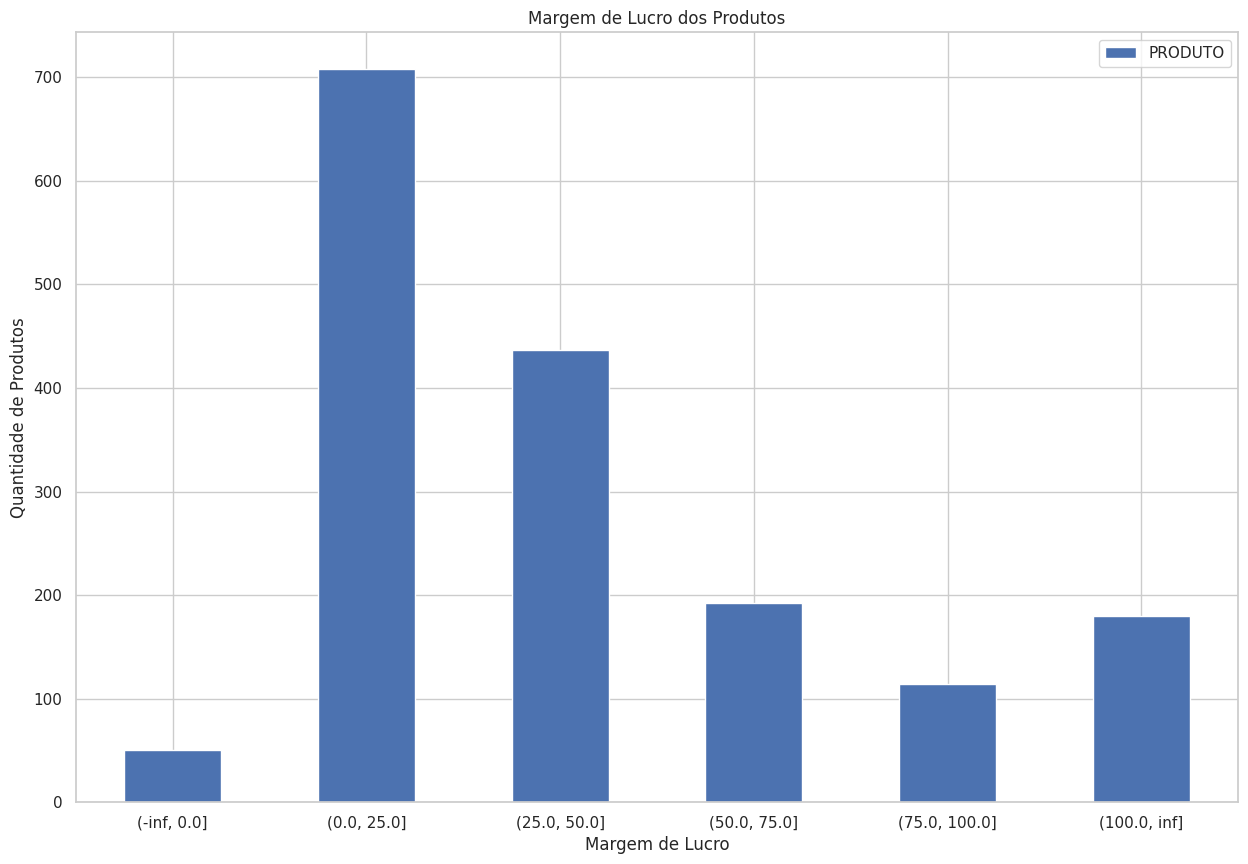

In [189]:
margem_negativa.plot(kind='bar', stacked=False,figsize=(15,10),x ='Bins',y='PRODUTO')

# labels for x & y axis
plt.xlabel('Margem de Lucro')
plt.ylabel('Quantidade de Produtos')
# title of plot
plt.title('Margem de Lucro dos Produtos')
plt.xticks(rotation=0)
plt.show()

In [190]:
linha= df_mergeprod.groupby('LINHA_PRODUTO')['MARGEM'].mean().reset_index()
linha

,LINHA_PRODUTO,MARGEM
0,ACESSORIOS,59.043083
1,BASICO,33.850190
2,BOLSAS,87.117598
3,COMPLEMENTOS,4.631800
4,Dado Ausente,31.818254
5,FASHION,38.989359
6,TECH,127.065822


## Margem por linha

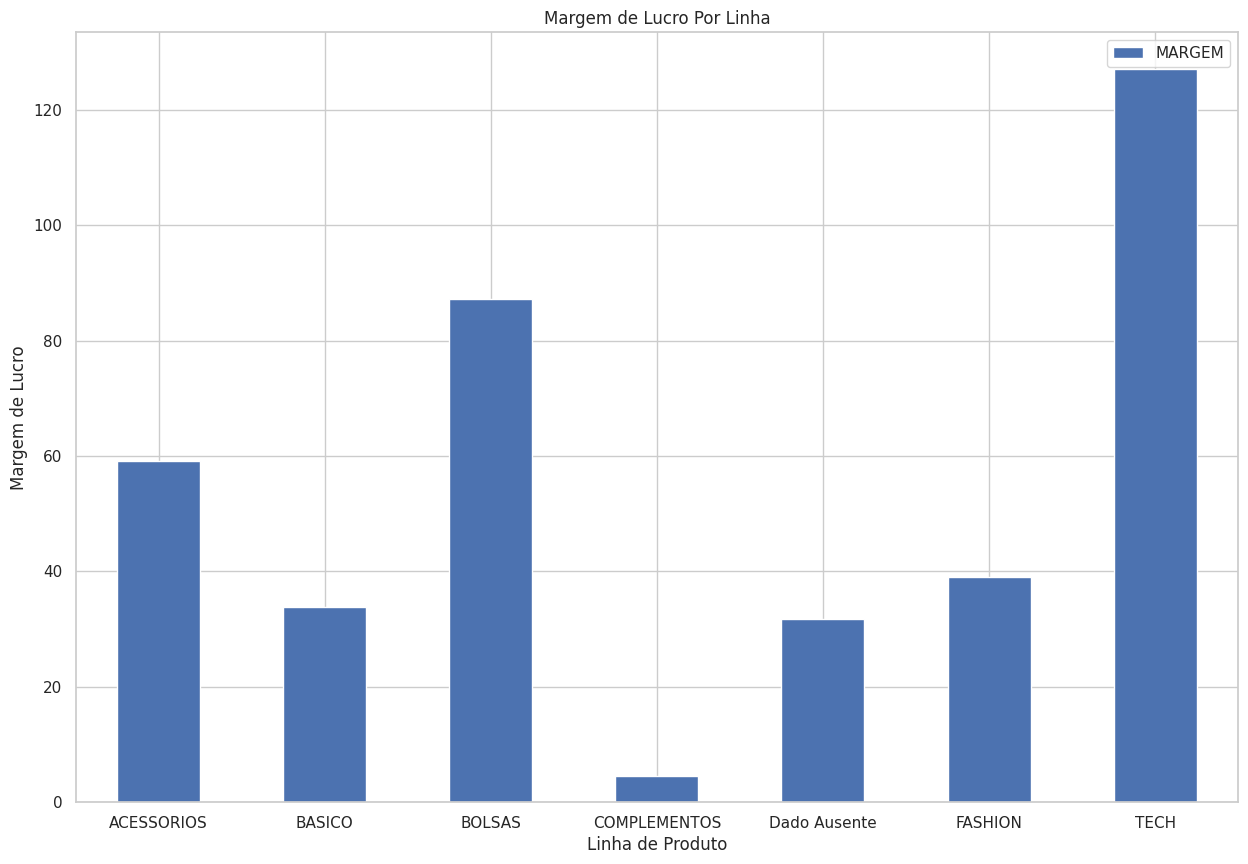

In [191]:
linha.plot(kind='bar', stacked=False,figsize=(15,10),x ='LINHA_PRODUTO',y='MARGEM')

# labels for x & y axis
plt.xlabel('Linha de Produto')
plt.ylabel('Margem de Lucro')
# title of plot
plt.title('Margem de Lucro Por Linha')
plt.xticks(rotation=0)
plt.show()

---
## - Análise de Perfil

In [192]:
df_merge.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA,COORTE,COORTE_INDEX,CANAL_MARKETING
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.9,45.10,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90,2020-01-01,1,Google Ads
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.9,43.13,BOLSAS,34.0,CE,Nordeste,7662.37,2020-01-01,1,Facebook Ads
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.9,21.97,FASHION,33.0,SP,Sudeste,7881.38,2020-01-01,1,Busca orgânica
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.8,6.73,BASICO,37.0,RJ,Sudeste,6765.96,2020-01-01,1,Facebook Ads
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.9,36.67,ACESSORIOS,49.0,PA,Norte,7586.56,2020-01-01,1,Dado Ausente


In [193]:
binsrenda = [0,5000,6000,7000,8000,np.inf]
df_merge['BINS_RENDA'] = pd.cut(df_merge['RENDA_PRESUMIDA'], binsrenda)
df_merge.head()

,DATA_VENDA,PEDIDO,PEDIDO_ERP,COD_CLIENTE,PRODUTO,QTDE,PRECO_UNITARIO,DESCONTO_ITEM,FRETE_PAGO_CLIENTE,RECEITA,CUSTO_FRETE,MES_VENDA,FATURAMENTO,CUSTO_MERCADORIA,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA,COORTE,COORTE_INDEX,CANAL_MARKETING,BINS_RENDA
0,2020-01-01,7000001,P10000123123,4040690,E10505Y,1,149.9,0.00,32.32,182.22,32.32,2020-01,149.9,45.10,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90,2020-01-01,1,Google Ads,"(7000.0, 8000.0]"
1,2020-01-01,7000003,P10000123124,4003939,E10513Y,1,189.9,0.00,0.00,189.90,0.00,2020-01,189.9,43.13,BOLSAS,34.0,CE,Nordeste,7662.37,2020-01-01,1,Facebook Ads,"(7000.0, 8000.0]"
2,2020-01-01,7000006,P10000123128,4043259,E10375Y,1,129.9,-12.99,26.93,143.84,26.93,2020-01,129.9,21.97,FASHION,33.0,SP,Sudeste,7881.38,2020-01-01,1,Busca orgânica,"(7000.0, 8000.0]"
3,2020-01-01,7000009,P10000123132,4090303,E10477Y,2,19.9,0.00,0.00,39.80,0.00,2020-01,39.8,6.73,BASICO,37.0,RJ,Sudeste,6765.96,2020-01-01,1,Facebook Ads,"(6000.0, 7000.0]"
4,2020-01-01,7000011,P10000294585,4080417,E10058Y,1,189.9,1.17,27.57,218.64,27.57,2020-01,189.9,36.67,ACESSORIOS,49.0,PA,Norte,7586.56,2020-01-01,1,Dado Ausente,"(7000.0, 8000.0]"


In [194]:
df_perfil= df_merge[['DATA_VENDA', 'COD_CLIENTE', 'FATURAMENTO','LINHA_PRODUTO','IDADE', 'UF','REGIAO','RENDA_PRESUMIDA', 'BINS_RENDA',
                    'PEDIDO','PEDIDO_ERP']].copy()

In [195]:
df_perfil

,DATA_VENDA,COD_CLIENTE,FATURAMENTO,LINHA_PRODUTO,IDADE,UF,REGIAO,RENDA_PRESUMIDA,BINS_RENDA,PEDIDO,PEDIDO_ERP
0,2020-01-01,4040690,149.9,ACESSORIOS,49.0,MT,Centro-Oeste,7898.90,"(7000.0, 8000.0]",7000001,P10000123123
1,2020-01-01,4003939,189.9,BOLSAS,34.0,CE,Nordeste,7662.37,"(7000.0, 8000.0]",7000003,P10000123124
2,2020-01-01,4043259,129.9,FASHION,33.0,SP,Sudeste,7881.38,"(7000.0, 8000.0]",7000006,P10000123128
3,2020-01-01,4090303,39.8,BASICO,37.0,RJ,Sudeste,6765.96,"(6000.0, 7000.0]",7000009,P10000123132
4,2020-01-01,4080417,189.9,ACESSORIOS,49.0,PA,Norte,7586.56,"(7000.0, 8000.0]",7000011,P10000294585
...,...,...,...,...,...,...,...,...,...,...,...
296932,2020-12-01,4049216,59.9,BASICO,53.0,MG,Sudeste,7114.90,"(7000.0, 8000.0]",8000000011,P10000294136
296933,2020-12-01,4019312,89.9,FASHION,35.0,PE,Nordeste,8400.16,"(8000.0, inf]",8000000012,P10000294137
296934,2020-12-01,4055873,229.9,ACESSORIOS,41.0,RN,Nordeste,8306.05,"(8000.0, inf]",8000000015,P10000294140
296935,2020-12-01,4086203,59.9,BASICO,31.0,MA,Nordeste,8068.73,"(8000.0, inf]",8000000017,P10000294142


In [196]:
ped= df_perfil.groupby('REGIAO')['PEDIDO'].count().reset_index()
ped

,REGIAO,PEDIDO
0,Centro-Oeste,25543
1,Nordeste,87233
2,Norte,24077
3,Sudeste,131877
4,Sul,28207


In [197]:
fat= df_perfil.groupby('REGIAO')['FATURAMENTO'].sum().reset_index()
fat

,REGIAO,FATURAMENTO
0,Centro-Oeste,2481262.37
1,Nordeste,7568882.39
2,Norte,2914541.65
3,Sudeste,10809750.54
4,Sul,2687282.39


In [198]:
trend6 = pd.crosstab(index = df_perfil['REGIAO'], columns = df_perfil['BINS_RENDA'] ).reset_index()
trend6

BINS_RENDA,REGIAO,"(0.0, 5000.0]","(5000.0, 6000.0]","(6000.0, 7000.0]","(7000.0, 8000.0]","(8000.0, inf]"
0,Centro-Oeste,0,90,3362,11959,10132
1,Nordeste,0,416,12146,42126,32545
2,Norte,0,24,1260,9053,13740
3,Sudeste,7,599,19329,65384,46558
4,Sul,0,118,3845,13880,10364


In [199]:
bins_idade = [0,20,35,50,65,70,85,100]
df_perfil['BINS_IDADE'] = pd.cut(df_perfil['IDADE'],bins_idade)


In [200]:
renda= df_perfil.groupby('BINS_RENDA')['FATURAMENTO'].sum().reset_index()
renda

/tmp/ipython-input-4111501033.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  renda= df_perfil.groupby('BINS_RENDA')['FATURAMENTO'].sum().reset_index()


,BINS_RENDA,FATURAMENTO
0,"(0.0, 5000.0]",199.30
1,"(5000.0, 6000.0]",49808.50
2,"(6000.0, 7000.0]",2139489.98
3,"(7000.0, 8000.0]",10800281.45
4,"(8000.0, inf]",13471940.11


In [201]:
idade= df_perfil.groupby('BINS_IDADE')['FATURAMENTO'].sum().reset_index()
idade

/tmp/ipython-input-939094500.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade= df_perfil.groupby('BINS_IDADE')['FATURAMENTO'].sum().reset_index()


,BINS_IDADE,FATURAMENTO
0,"(0, 20]",430735.71
1,"(20, 35]",11738508.76
2,"(35, 50]",10982164.01
3,"(50, 65]",3180830.23
4,"(65, 70]",63478.90
5,"(70, 85]",66001.73
6,"(85, 100]",0.00


In [202]:
idade2= df_perfil.groupby('BINS_IDADE')['FATURAMENTO'].sum().reset_index()
idade2

/tmp/ipython-input-1103680832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade2= df_perfil.groupby('BINS_IDADE')['FATURAMENTO'].sum().reset_index()


,BINS_IDADE,FATURAMENTO
0,"(0, 20]",430735.71
1,"(20, 35]",11738508.76
2,"(35, 50]",10982164.01
3,"(50, 65]",3180830.23
4,"(65, 70]",63478.90
5,"(70, 85]",66001.73
6,"(85, 100]",0.00


### Baseado nos dados, o perfil ideal q

<Axes: xlabel='REGIAO', ylabel='IDADE'>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


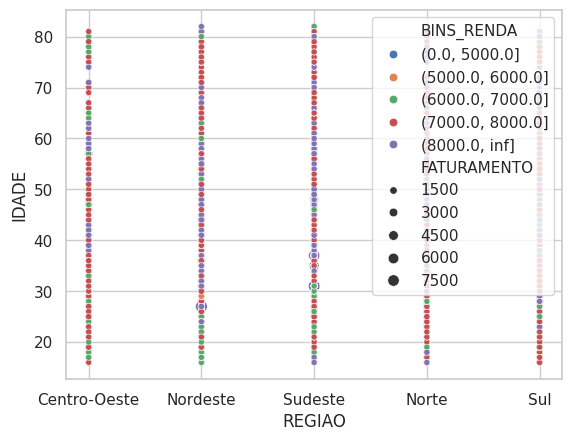

In [203]:
sns.scatterplot(x='REGIAO', y='IDADE', data=df_perfil ,hue='BINS_RENDA', size = "FATURAMENTO")